In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

folder = "data/240604/103.5"
# folder = "data/240625/45_2/mono_minmax_no_silence"
sr = 48000

# bottom, top
sig1, _ = librosa.load(folder + "/" + "hal_in_pure_24_4ch_48k_1.wav", sr=None)
sig2, _ = librosa.load(folder + "/" + "hal_in_pure_24_4ch_48k_2.wav", sr=None)


n = sig1.size + sig2.size

SIG1 = np.fft.rfft(sig1, n=n)
SIG2 = np.fft.rfft(sig2, n=n)

R = SIG1 * np.conj(SIG2)
cc = np.fft.irfft(R / np.abs(R))
    
sample_delay = 0
max_shift = n // 2
cc = np.concatenate((cc[-max_shift:], cc[:max_shift]))
sample_delay = np.argmax(cc) - max_shift
tdoa = sample_delay / float(sr)


distance = 0.161
sound_speed = 343.2
doa = np.arccos(tdoa * sound_speed / distance)
print(f"Azimuth: {np.degrees(doa)-90:.4f}")

Azimuth: 20.8106


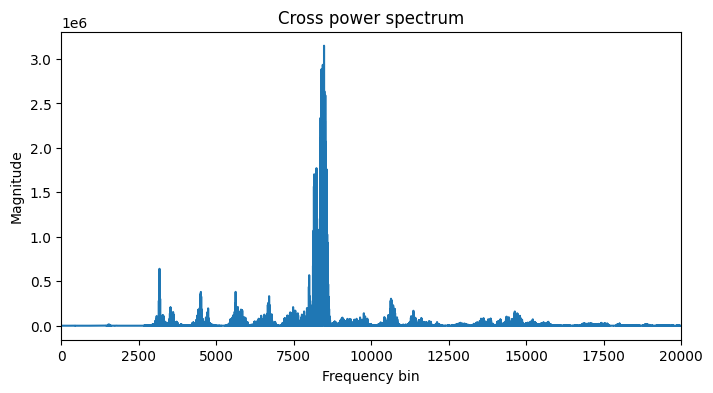

In [9]:
plt.figure(figsize=(8,4))
plt.title("Cross power spectrum")
plt.xlabel("Frequency bin")
plt.ylabel("Magnitude")
plt.xlim(0, 20000)
plt.plot(np.abs(R))
plt.show()

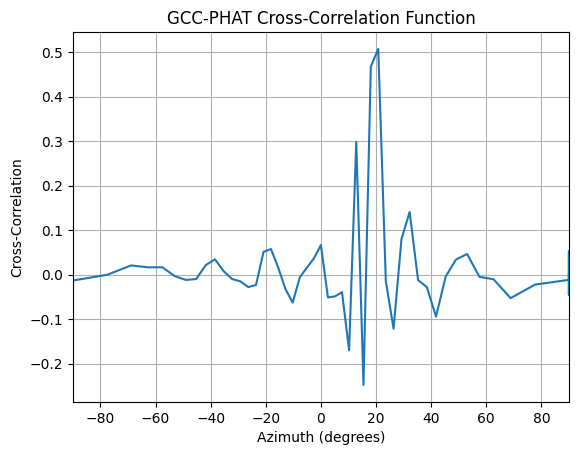

In [3]:
max_lag = cc.size // 2
lags = np.arange(-max_lag, max_lag) / float(sr)
clipped_lags = np.clip(lags * sound_speed / distance, -1, 1)
angles = np.degrees(np.arccos(clipped_lags)) - 90

plt.plot(angles, cc)
plt.title('GCC-PHAT Cross-Correlation Function')
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Cross-Correlation')
plt.xlim(-90, 90)
plt.grid(True)
plt.show()